TO-DO:
1. Find the most suitable Neighbour Joining output format in order to be converted to linkage matrix.
2. Develop the conversion function between let's say Newick format and Linkage matrix
3. Run POLO on such a matrix and visualise it.

In [240]:
import numpy as np
from skbio import DistanceMatrix
from skbio.tree import nj

%matplotlib inline

from math import atan2, pi
from random import randint

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform

from neighborjoining.neighbor_joining import (run_neighbor_joining, make_rooted,
                                              get_points_radial, get_points_circular, get_children)

Inferring phylogenetic tree from sample data by using `Neighbour joining` algorithm implemented in 
1. __[skbio.tree](http://scikit-bio.org/docs/0.2.0/tree.html)__ 
2. __[Jure's Steblaj implementation](http://eprints.fri.uni-lj.si/3899/1/63140259-JURIJ_%C5%A0TEBLAJ-Metoda_razvr%C5%A1%C4%8Danja_z_zdru%C5%BEevanjem_najbli%C5%BEjih_sosedov_v_programu_Orange-2.pdf)__  

In [213]:
# Distance matrix
                        0, 1, 2, 3, 4     
distances = np.array([0[0, 5, 9, 9, 8],
                      1[5, 0, 10, 10, 9],
                      2[9, 10, 0, 8, 7],
                      3[9, 10, 8, 0, 3],
                      4[8, 9, 7, 3, 0]])

distances_1 = np.array([[0, 5, 4, 7, 6, 8],
                       [5, 0, 7,10, 9,11],
                        [4, 7, 0, 7, 6, 8],
                       [7,10, 7, 0, 5, 9],
                       [6, 9, 6, 5, 0, 8 ],
                       [8,11, 8, 9, 8, 0]])
indexes = list('abcde')

### Skbio.tree NJ implementation

In [214]:
distance_matrix = DistanceMatrix(distances,indexes)

In [215]:
# Phylogenetic tree represented in Newick format
newick_tree = nj(distance_matrix,result_constructor=str)
newick_tree

'(d:2.000000, (c:4.000000, (b:3.000000, a:2.000000):3.000000):2.000000, e:1.000000);'

In [192]:
newick_tree = nj(distance_matrix)
print(newick_tree.ascii_art())

                    /-c
          /--------|
         |         |          /-b
         |          \--------|
         |                    \-a
---------|
         |          /-e
         |---------|
         |          \-d
         |
          \-f


### Jure's Steblaj implementation

In [241]:
def plot(tree, points, labels=[], classes=None):
    for v1 in tree:
        for v2 in get_children(tree, v1):
            plt.plot((points[v1][0], points[v2][0]), (points[v1][1], points[v2][1]), 'k')
            if v2 < len(labels):
                delta = points[v2] - points[v1]
                angle = atan2(delta[1], delta[0])*180/pi
                angle = (angle + 360) % 360
                if angle > 90 and angle < 270:
                    alignment = "right"
                else:
                    alignment = "left"
                if angle < 90:
                    pass
                elif angle < 180:
                    pass
                elif angle < 270:
                    pass
                else:
                    pass
                if angle < 45:
                    va = "center"
                elif angle < 135:
                    va = "bottom"
                elif angle < 225:
                    va = "center"
                elif angle < 315:
                    va = "top"
                else:
                    va = "center"

                if angle > 90 and angle < 270:
                    rotation = (angle + 180) % 360
                else:
                    rotation = angle
                plt.text(*points[v2], labels[v2], rotation=rotation,
                         va=va, clip_on=True, ha=alignment)

    if classes != None:
        for c in classes:
            plt.plot([points[x][0] for x in c], [points[x][1] for x in c], ".", ms=3)

    # plt.savefig("output.svg")
    plt.show()

In [236]:
# Unrooted phylogenetic tree inferred from distance matrix
unrooted_tree = run_neighbor_joining(distances)
unrooted_tree

# Conversion to rooted phylogenetic tree 
rooted_tree = make_rooted(unrooted_tree)

In [237]:
# Inferring radial points to be plotted
radial_points = get_points_radial(rooted_tree)
labels = radial_points.keys()

In [238]:
unrooted_tree

{1: [[5, 3.0]],
 0: [[5, 2.0]],
 5: [[1, 3.0], [0, 2.0], [6, 3.0]],
 2: [[6, 4.0]],
 6: [[5, 3.0], [2, 4.0], [7, 2.0]],
 4: [[7, 1.0]],
 3: [[7, 2.0]],
 7: [[4, 1.0], [3, 2.0], [6, 2.0]]}

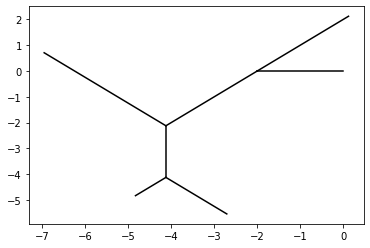

In [242]:
plot(rooted_tree,radial_points)

Newick format:
http://marvin.cs.uidaho.edu/Teaching/CS515/newickFormat.html

TO-DO
1. Since a tree produced in Newick format is a string, make a newick_parser and then make a converter to linkage matrix

In [ ]:
# https://github.com/kgori/newick/blob/master/newick.py

In [357]:
import re
import numpy as np
def newick_parser(newick_tree:str):
    linkage_matrix = []
    pattern = re.compile(r'\s+')
    newick_tree = re.sub(pattern, '', newick_tree)
    tokens = re.split(r"\s*(;|\(|\)|\[|\]|,|:|=)\s*",newick_tree)
    tokens = [token for token in tokens if token != '' and token != ';']
    count = 1
    for ind,token in enumerate(tokens):
        if token == "(" :
            linkage_matrix.append([])
        elif token ==',' and tokens[ind+1] == '(':
            continue
        elif token == ')':
            continue
        elif token == ':':
            continue
        else:
            x = tokens[ind-1]
            
            if x in ("(",","):
                token = float(token)
                last_link = linkage_matrix[len(linkage_matrix)-1]                
                linkage_matrix.insert(0,[token]) if len(last_link) >=2  else linkage_matrix[len(linkage_matrix)-1].append(token)
            elif x == ')':
                token = float(token)
                count+=1
                last_link = linkage_matrix[len(linkage_matrix)-count]
                linkage_matrix.append([token]) if len(last_link) >=2 else linkage_matrix[len(linkage_matrix)-count].append(token)                
    return np.flip(np.array(linkage_matrix))
            
            

In [358]:
def produce_linkage_matrix(newick_tree,distance_matrix):
    partial_linkage_matrix = newick_parser(newick_tree)
    dist_obs = np.array([[50 * (i),i+1] for i in range(len(partial_linkage_matrix))])
    return np.hstack((partial_linkage_matrix,dist_obs)).astype(float)
    

#### TO DO 04.02.2021
1. Check if POLO can be generalized to accept non binary nodes
2. Maybe we can impute dummy nodes with distance = 0 in order to make it work 

Prof:
 1. Try to make POLO work, 
 2. Read and check https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1007347
 3. 

### 08.02.2021
1. Scipy dendogram representation, try to make linkage matrix from newick format

### Examples 

Example 1

In [196]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import ClusterWarning
from warnings import simplefilter
simplefilter("ignore", ClusterWarning)

In [359]:
newick_string_tree_1 = '((2:2.000000,(1:4.000000, 0:1.000000)6:1.000000)7:1.000000, (4:2.000000, 3:3.000000)8:1.000000,5:5.00000)9'
newick_parser(newick_string_tree_1)
# link_matrix_1 = produce_linkage_matrix(newick_string_tree_1,distances_1)

array([[3., 4.],
       [0., 1.],
       [6., 2.],
       [8., 7.],
       [9., 5.]])

In [195]:
# Linkage matrix, ready to be used in POLO
link_matrix_1

array([[  3.,   4.,   0.,   0.],
       [  0.,   1.,  50.,   1.],
       [  6.,   2., 100.,   2.],
       [  8.,   7., 150.,   3.],
       [  9.,   5., 200.,   4.]])

In [200]:
# Prints the unordered leaves list of the phylogenetic tree
hierarchy.leaves_list(link_matrix_1)

array([3, 4, 2, 0, 1, 5], dtype=int32)

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [10.0, 10.0, 25.0, 25.0],
  [35.0, 35.0, 45.0, 45.0],
  [17.5, 17.5, 40.0, 40.0],
  [28.75, 28.75, 55.0, 55.0]],
 'dcoord': [[0.0, 0.0, 0.0, 0.0],
  [0.0, 100.0, 100.0, 0.0],
  [0.0, 50.0, 50.0, 0.0],
  [100.0, 150.0, 150.0, 50.0],
  [150.0, 200.0, 200.0, 0.0]],
 'ivl': ['3', '4', '2', '0', '1', '5'],
 'leaves': [3, 4, 2, 0, 1, 5],
 'color_list': ['C1', 'C1', 'C2', 'C0', 'C0']}

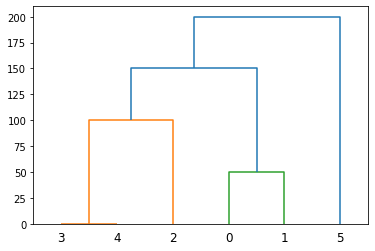

In [207]:
# Plots the dendogram based on the unordered leaves list
hierarchy.dendrogram(link_matrix_1)

In [204]:
# Performing POLO on the same same linkage matrix 
optimal_ordering = hierarchy.leaves_list(hierarchy.optimal_leaf_ordering(link_matrix_1,distances_1))
optimal_ordering

array([1, 0, 2, 4, 3, 5], dtype=int32)

#### Example 2 


In [361]:
newick_string_tree_2 = '(3:2.000000, (2:4.000000, (1:3.000000, 0:2.000000)5:3.000000)6:2.000000, 4:1.000000)7'
# link_matrix_2 = produce_linkage_matrix(newick_string_tree_2,np.array(distances))
newick_parser(newick_string_tree_2)

array([[0., 1.],
       [5., 2.],
       [6., 3.],
       [7., 4.]])

In [231]:
link_matrix_2

array([[  0.,   1.,   0.,   1.],
       [  5.,   2.,  50.,   2.],
       [  6.,   3., 100.,   3.],
       [  7.,   4., 150.,   4.]])

In [247]:
# Unordered leaves list
initial_ordering = hierarchy.leaves_list(link_matrix_2)
initial_ordering

array([0, 1, 2, 3, 4], dtype=int32)

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [10.0, 10.0, 25.0, 25.0],
  [17.5, 17.5, 35.0, 35.0],
  [26.25, 26.25, 45.0, 45.0]],
 'dcoord': [[0.0, 0.0, 0.0, 0.0],
  [0.0, 50.0, 50.0, 0.0],
  [50.0, 100.0, 100.0, 0.0],
  [100.0, 150.0, 150.0, 0.0]],
 'ivl': ['0', '1', '2', '3', '4'],
 'leaves': [0, 1, 2, 3, 4],
 'color_list': ['C1', 'C1', 'C1', 'C0']}

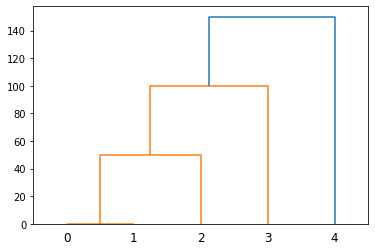

In [234]:
# Dendrogram on unordered tree
hierarchy.dendrogram(link_matrix_2)

In [248]:
# Polo 
optimal_ordering = hierarchy.leaves_list(hierarchy.optimal_leaf_ordering(link_matrix_2,distances))
optimal_ordering

array([1, 0, 2, 3, 4], dtype=int32)

##### In the initial ordering of [0,1,2,3,4] the function cost is 3+8+10+5 = 26, while the cost for the optimal one is equal to 25

#### TO-DO:
1. Make a function that is calculate the ordering cost 
2. Make a function that is going to do a brute force ordering in order to check the polo as well as the linkage matrix

In [264]:
import itertools

In [263]:
def calculate_ordering_cost(ordering,distance):
    return sum([distance[ordering[i]][ordering[i+1]] for i in range(len(ordering)-1)])

In [280]:
def brute_force_optimal_ordering(linkage_matrix, distance_matrix):
    leaves = hierarchy.leaves_list(linkage_matrix)
    orderings = min([(perm,calculate_ordering_cost(perm,distance_matrix)) for perm in itertools.permutations(leaves)],key=lambda x :x[1])
    return orderings

In [281]:
brute_force_optimal_ordering(link_matrix_2,distances)


((1, 0, 2, 4, 3), 24)

In [371]:
import re
import numpy as np
def newick_parser_1(newick_tree:str):
    linkage_matrix = []
    pattern = re.compile(r'\s+')
    newick_tree = re.sub(pattern, '', newick_tree)
    tokens = re.split(r"\s*(;|\(|\)|\[|\]|,|:|=)\s*",newick_tree)
    tokens = [token for token in tokens if token != '' and token != ';']
    count = 1
    for ind,token in enumerate(tokens):
        if token == "(" :
            linkage_matrix.append([])
        elif token ==',' and tokens[ind+1] == '(':
            continue
        elif token == ')':
            continue
        elif token == ':':
            continue
        else:
            x = tokens[ind-1]
            
            if x in ("(",","):
                token = float(token)
                last_link = linkage_matrix[len(linkage_matrix)-1]                
                linkage_matrix.insert(0,[token]) if len(last_link) >=2  else linkage_matrix[len(linkage_matrix)-1].append(token)
            elif x == ')':
                token = float(token)
                count+=1
                last_link = linkage_matrix[len(linkage_matrix)-count]
                print(linkage_matrix,len(linkage_matrix),token,last_link,count)
                if len(last_link) >=2:
#                     count+=1
#                     linkage_matrix.append([token])
                    linkage_matrix = [[token]] + linkage_matrix 
                else:
                    linkage_matrix[len(linkage_matrix)-count].append(token) 
                    count-=1
                
    print(linkage_matrix)
    return np.flip(np.array(linkage_matrix))
            
            

In [372]:
newick_string_tree_5 = '(3:2.000000,4:1.000000,(2:4.000000, (1:3.000000, 0:2.000000)5:3.000000)6:2.000000)7'
newick_parser_1(newick_string_tree_5)

[[3.0, 4.0], [2.0], [1.0, 0.0]] 3 5.0 [2.0] 2
[[3.0, 4.0], [2.0, 5.0], [1.0, 0.0]] 3 6.0 [2.0, 5.0] 2
[[6.0], [3.0, 4.0], [2.0, 5.0], [1.0, 0.0]] 4 7.0 [3.0, 4.0] 3
[[7.0], [6.0], [3.0, 4.0], [2.0, 5.0], [1.0, 0.0]]


<ipython-input-371-ad331bb00122>:40: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.flip(np.array(linkage_matrix))


array([list([1.0, 0.0]), list([2.0, 5.0]), list([3.0, 4.0]), list([6.0]),
       list([7.0])], dtype=object)